<a href="https://colab.research.google.com/github/ajinkyajumde/Airline-Passenger-Referral/blob/main/Rossmann_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [83]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter projects/Rossman sales prediction/Rossmann Stores Data.csv')

In [86]:
other = pd.read_csv('/content/drive/MyDrive/Almabetter projects/Rossman sales prediction/Rossmann Stores Data.csv')

### Data Inspection

In [87]:
# First look
dataset.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [89]:
dataset.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [90]:
dataset.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [91]:
dataset=dataset.dropna()

In [92]:
other.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [93]:
dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 77.6+ MB


In [95]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [96]:
dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [97]:
dataset.isnull().sum().to_frame().rename(columns={0:'Missing values count'})

,Missing values count
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [98]:
#check Duplicates value
dataset[dataset.duplicated()].count().to_frame().rename(columns={0:'Duplicate values count'})

,Duplicate values count
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [99]:
# Dependent/target Variable 
dataset['Sales'].describe().apply(lambda x:format(x,'.2f')).to_frame()

,Sales
count,1017209.00
mean,5773.82
std,3849.93
min,0.00
25%,3727.00
50%,5744.00
75%,7856.00
max,41551.00


### Exploratory Data Analysis

In [100]:
dataset['Sales'] = dataset['Sales'].astype(int)

Text(0.5, 1.0, 'Boxplot for Sales Values')

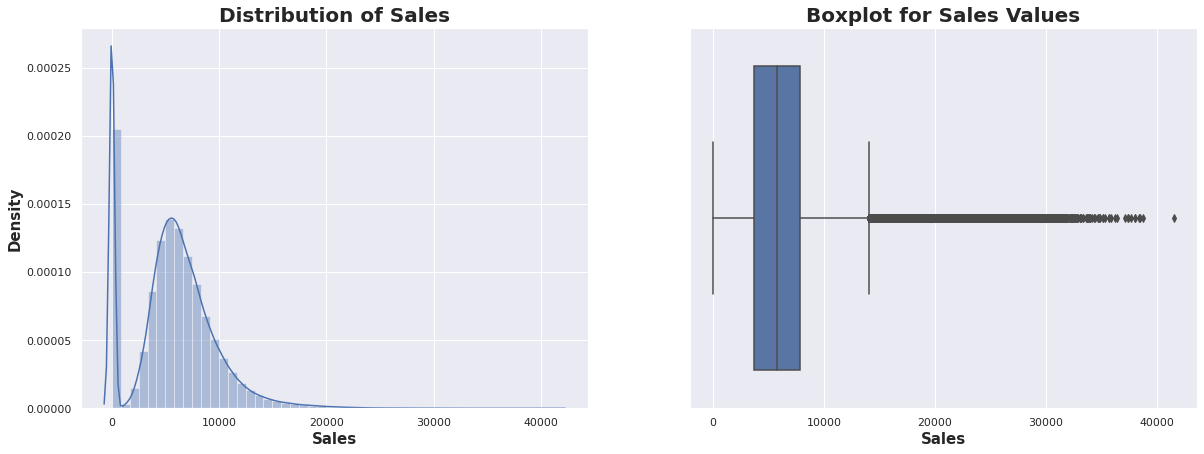

In [101]:
sns.set(style='darkgrid')
plt.figure( figsize = (20,7))
plt.subplot(121)
ax = sns.distplot(dataset['Sales'], kde = True)
ax.set_xlabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Density',size=15,fontdict={"weight": "bold"})
ax.set_title("Distribution of Sales",fontsize=20,fontdict={"weight": "bold"})

plt.subplot(122)
ax = sns.boxplot(dataset['Sales'])
ax.set_xlabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Boxplot for Sales Values",fontsize=20,fontdict={"weight": "bold"})

In [102]:
dataset=dataset[dataset['Sales']>0]

Text(0.5, 1.0, 'Boxplot for Sales Values')

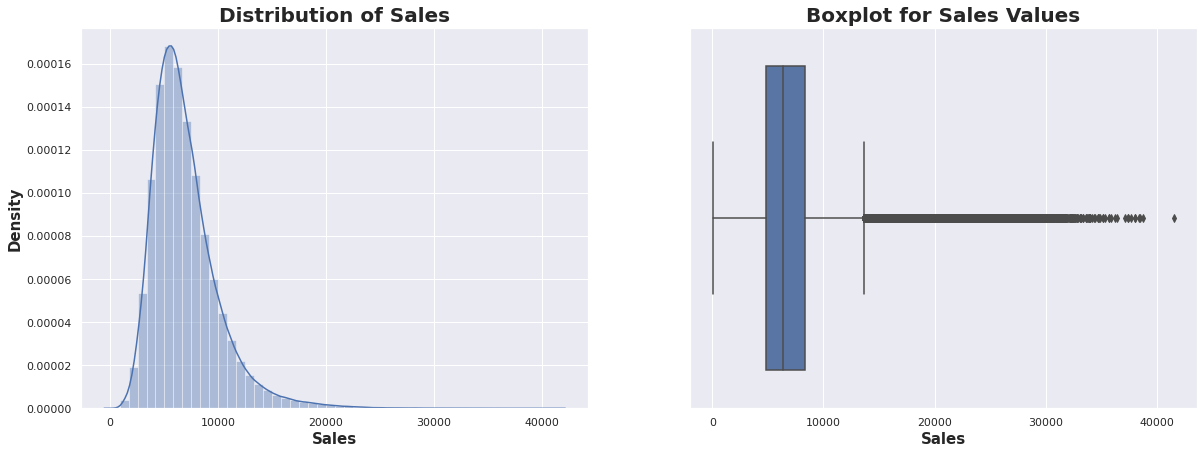

In [103]:
sns.set(style='darkgrid')
plt.figure( figsize = (20,7))
plt.subplot(121)
ax = sns.distplot(dataset['Sales'], kde = True)
ax.set_xlabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Density',size=15,fontdict={"weight": "bold"})
ax.set_title("Distribution of Sales",fontsize=20,fontdict={"weight": "bold"})

plt.subplot(122)
ax = sns.boxplot(dataset['Sales'])
ax.set_xlabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Boxplot for Sales Values",fontsize=20,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'Boxplot for Sales Values')

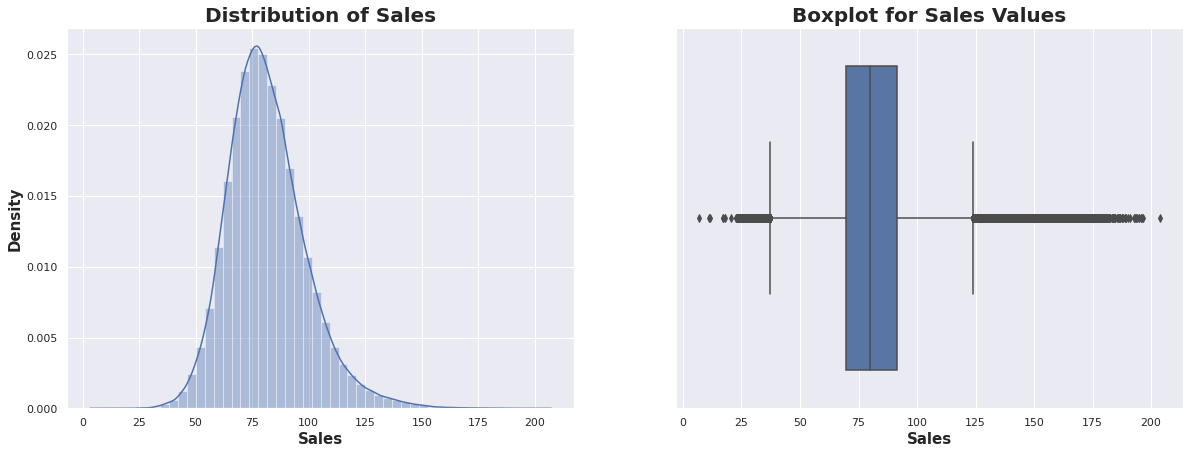

In [104]:
sns.set(style='darkgrid')
plt.figure( figsize = (20,7))
plt.subplot(121)
ax = sns.distplot(np.sqrt(dataset['Sales']), kde = True)
ax.set_xlabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Density',size=15,fontdict={"weight": "bold"})
ax.set_title("Distribution of Sales",fontsize=20,fontdict={"weight": "bold"})

plt.subplot(122)
ax = sns.boxplot(np.sqrt(dataset['Sales']))
ax.set_xlabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Boxplot for Sales Values",fontsize=20,fontdict={"weight": "bold"})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ef37e8760>,
      dtype=object)

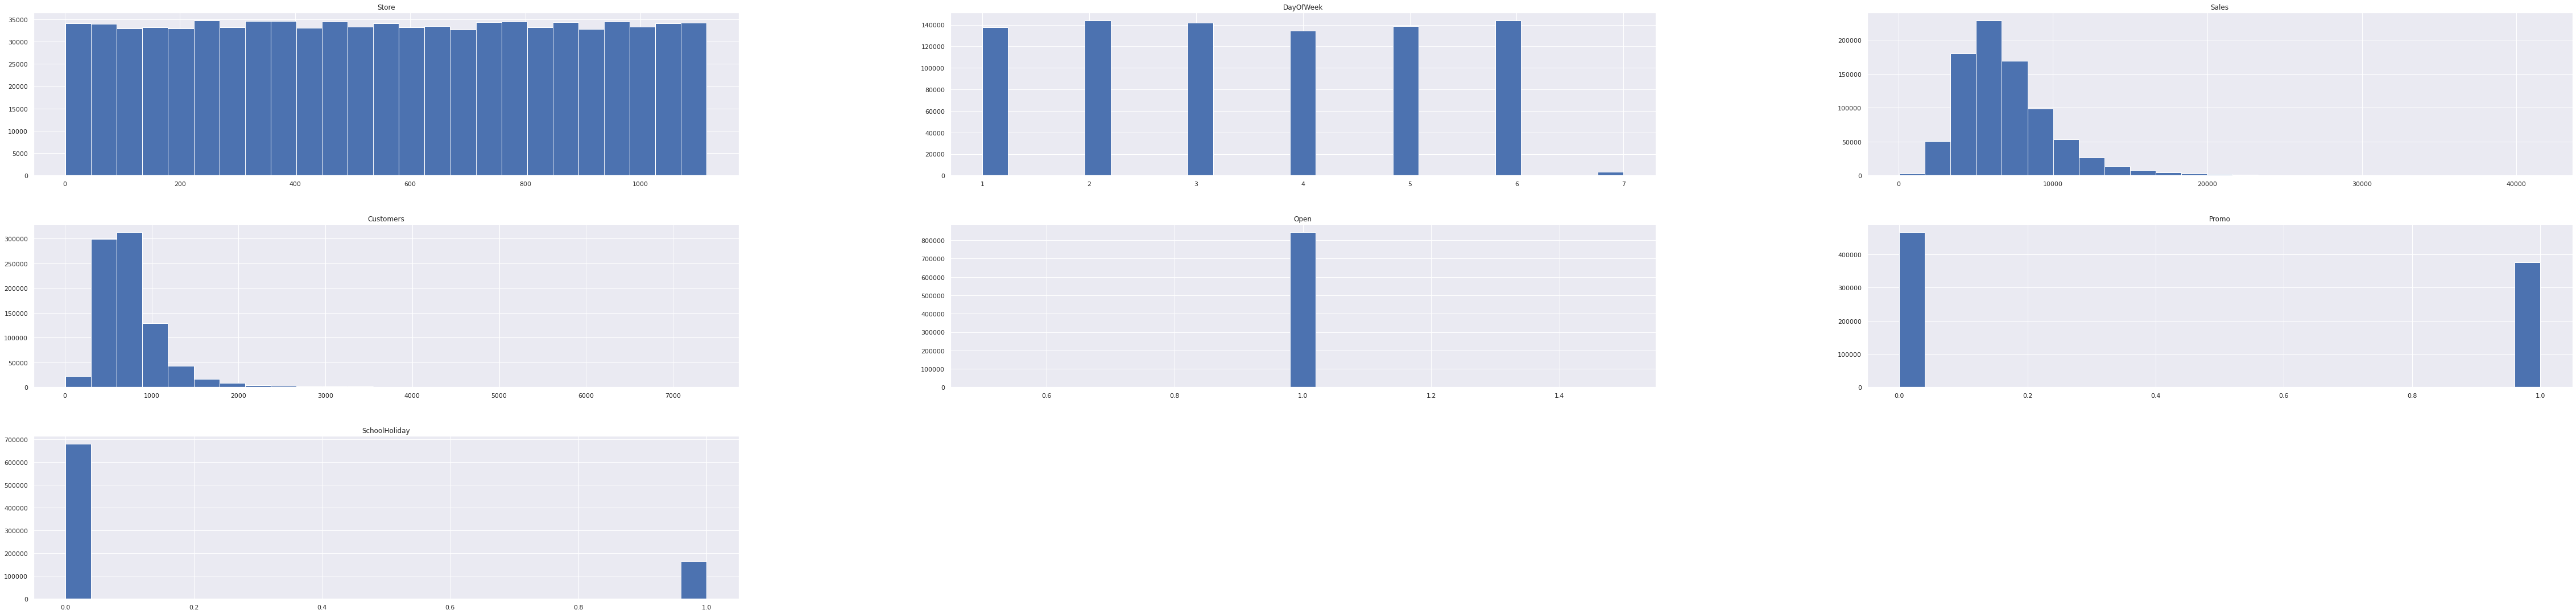

In [105]:
# select numerical variables

numerical_feature = dataset.select_dtypes( include = ['int64', 'float64'])

numerical_feature.hist(bins = 25, figsize = (80,60), layout = (9,3))

Text(0.5, 1.0, 'Assortment')

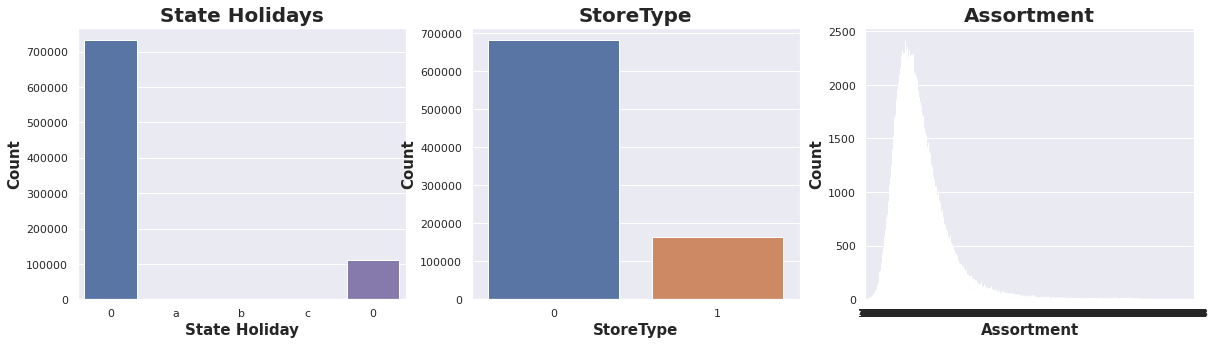

In [106]:
# state_holiday
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
ax = sns.countplot(dataset['StateHoliday'])
ax.set_xlabel('State Holiday',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"})
ax.set_title("State Holidays",fontsize=20,fontdict={"weight": "bold"})

# store_type
plt.subplot(1,3,2)
ax = sns.countplot(dataset['SchoolHoliday'])
ax.set_xlabel('StoreType',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"})
ax.set_title("StoreType",fontsize=20,fontdict={"weight": "bold"})

# assortment
plt.subplot(1,3,3)
ax=sns.countplot(dataset['Customers'])
ax.set_xlabel('Assortment',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"})
ax.set_title("Assortment",fontsize=20,fontdict={"weight": "bold"})

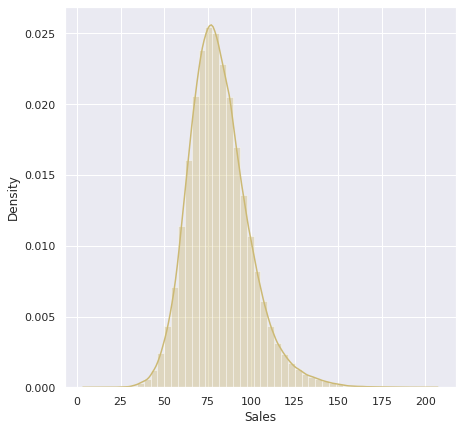

In [107]:
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(dataset['Sales']),color="y")

In [108]:
numerical_columns=list(dataset.describe())
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday'],
      dtype='object')

In [109]:
from datetime import datetime
import datetime as dt

In [110]:
dataset['Date']

0          2015-07-31
1          2015-07-31
2          2015-07-31
3          2015-07-31
4          2015-07-31
              ...    
1016776    2013-01-01
1016827    2013-01-01
1016863    2013-01-01
1017042    2013-01-01
1017190    2013-01-01
Name: Date, Length: 844338, dtype: object

In [111]:
# splitting "Date" column into three other columns like "year","month","day".
dataset['Date'] = dataset['Date'].apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d"))

In [112]:
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()

[Text(0.5, 1.0, 'Sales acording to Month ')]

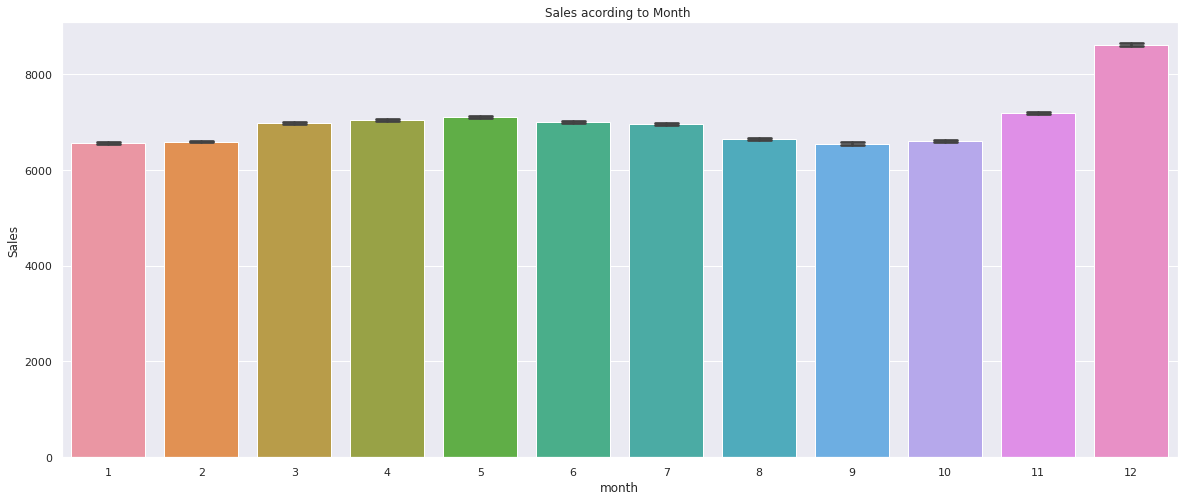

In [113]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=dataset,x='month',y='Sales',ax=ax,capsize=.25)
ax.set(title='Sales acording to Month ')

[Text(0.5, 1.0, 'Sales acording to Month ')]

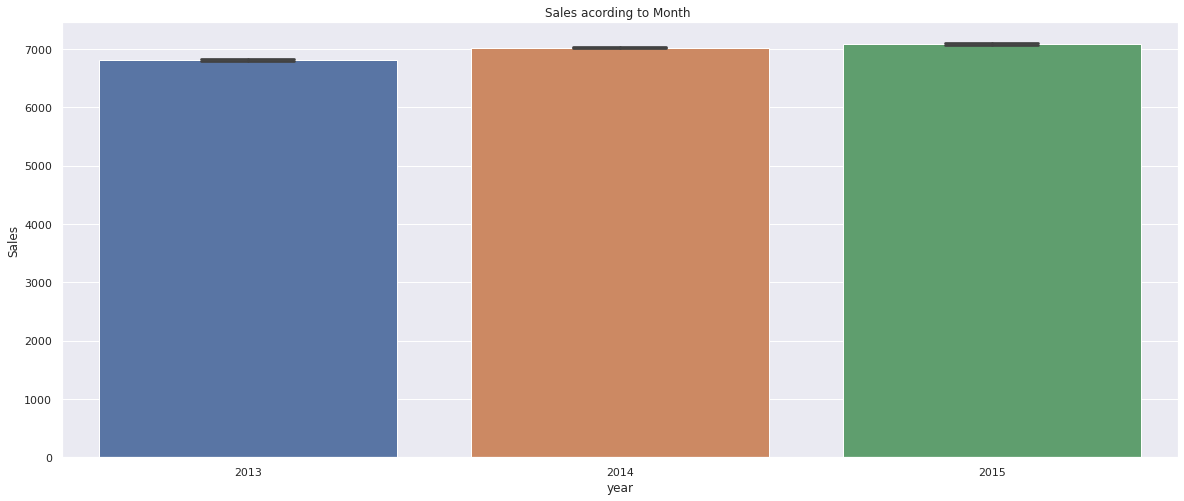

In [114]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=dataset,x='year',y='Sales',ax=ax,capsize=.25)
ax.set(title='Sales acording to Month ')

[Text(0.5, 1.0, 'Sales acording to Day ')]

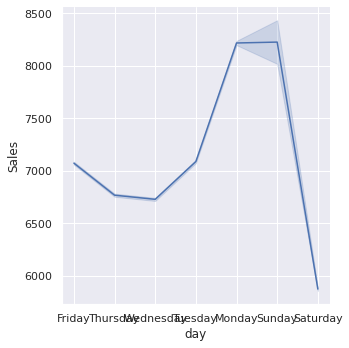

In [115]:
sns.relplot(data=dataset,x='day',y='Sales',kind='line')
ax.set(title='Sales acording to Day ')

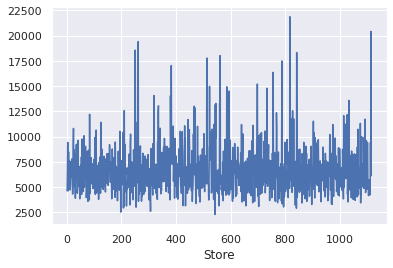

In [116]:
#'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
#       'SchoolHoliday'
dataset.groupby('Store').median()['Sales'].plot()

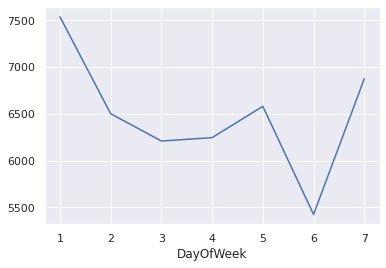

In [117]:
#'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
#       'SchoolHoliday'
dataset.groupby('DayOfWeek').median()['Sales'].plot()

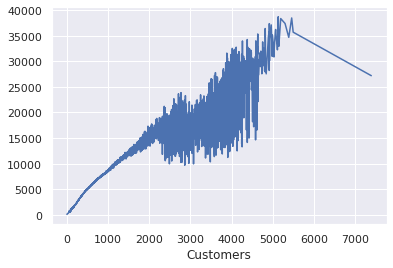

In [118]:
#'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
#       'SchoolHoliday'
dataset.groupby('Customers').median()['Sales'].plot()

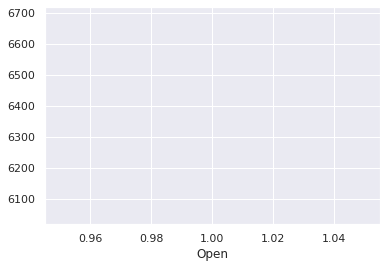

In [119]:
#'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
#       'SchoolHoliday'
dataset.groupby('Open').median()['Sales'].plot()

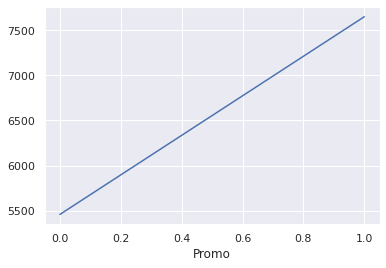

In [120]:
#'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
#       'SchoolHoliday'
dataset.groupby('Promo').median()['Sales'].plot()

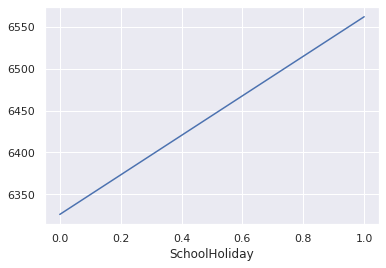

In [121]:
#'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
#       'SchoolHoliday'
dataset.groupby('SchoolHoliday').median()['Sales'].plot()

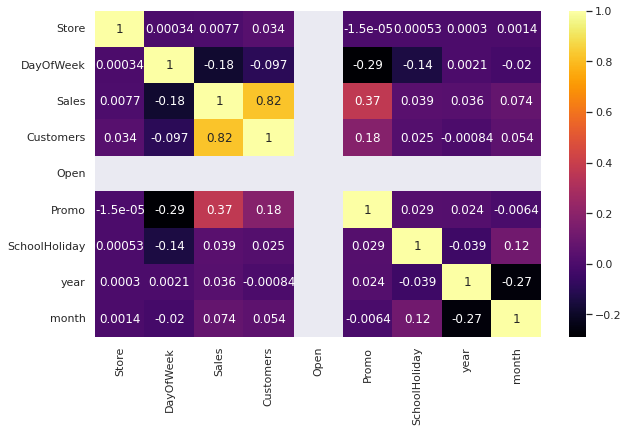

In [122]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap='inferno',annot=True)

In [123]:
dataset=dataset.drop(['Open'],axis=1)

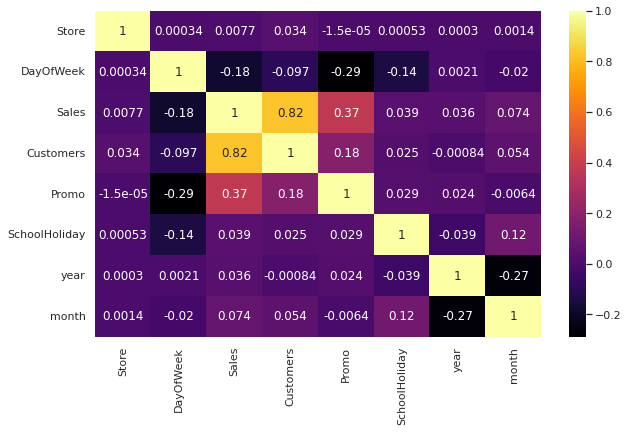

In [124]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap='inferno',annot=True)

In [125]:
dataset['day']=dataset.apply((lambda x : 0 if x['day']=='Sunday' or x['day']=='Saturday' else 1),axis=1)

In [126]:
dataset

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,1
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,1
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,1
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,1
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,1
...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1,2013,1,1
1016827,733,2,2013-01-01,10765,2377,0,a,1,2013,1,1
1016863,769,2,2013-01-01,5035,1248,0,a,1,2013,1,1
1017042,948,2,2013-01-01,4491,1039,0,a,1,2013,1,1


In [127]:
dataset=pd.get_dummies(dataset, columns=['Promo','StateHoliday','SchoolHoliday'], prefix=['Promo','StateHoliday','SchoolHoliday'])

In [128]:
dataset=dataset.drop(['year'],axis=1)

In [129]:
dataset=dataset.drop(['Date'],axis=1)

In [130]:
import statsmodels.api as sm
X = dataset[[ 'DayOfWeek','Customers',]]
Y = dataset['Sales']
dataset.head()

,Store,DayOfWeek,Sales,Customers,month,day,Promo_0,Promo_1,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_0,SchoolHoliday_1
0,1,5,5263,555,7,1,0,1,0,1,0,0,0,0,1
1,2,5,6064,625,7,1,0,1,0,1,0,0,0,0,1
2,3,5,8314,821,7,1,0,1,0,1,0,0,0,0,1
3,4,5,13995,1498,7,1,0,1,0,1,0,0,0,0,1
4,5,5,4822,559,7,1,0,1,0,1,0,0,0,0,1


In [131]:
#add a constant column
X = sm.add_constant(X)
X

,const,DayOfWeek,Customers
0,1.0,5,555
1,1.0,5,625
2,1.0,5,821
3,1.0,5,1498
4,1.0,5,559
...,...,...,...
1016776,1.0,2,566
1016827,1.0,2,2377
1016863,1.0,2,1248
1017042,1.0,2,1039


In [132]:
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                 9.312e+05
Date:                Sat, 28 Jan 2023   Prob (F-statistic):               0.00
Time:                        08:22:09   Log-Likelihood:            -7.4951e+06
No. Observations:              844338   AIC:                         1.499e+07
Df Residuals:                  844335   BIC:                         1.499e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2784.5017      5.852    475.800      0.000    2773.032    2795.972
DayOfWeek   -179.3307      1.100   -163.073      0.000    -181.486    -177.175
Customers      6.2964      0.005   1332.636      0.000       6.287       6.306
==============================================================================
Omnibus:                   117675.268   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1350330.511
Skew:                           0.268   Prob(JB):                         0.00
Kurtosis:                       9.172   Cond. No.                     2.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
X.corr()

,const,DayOfWeek,Customers
const,NaN,NaN,NaN
DayOfWeek,NaN,1.000000,-0.097266
Customers,NaN,-0.097266,1.000000


In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [135]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Store,1.002529
1,DayOfWeek,1.842578
2,Sales,3.760419
3,Customers,3.329905
4,month,1.030578
5,day,2.080440
6,Promo_0,inf
7,Promo_1,inf
8,StateHoliday_0,inf
9,StateHoliday_0,inf


In [136]:
X = dataset.drop(columns=['Sales'], axis=1)
y = np.sqrt(dataset['Sales'])

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(675470, 14)
(168868, 14)


In [138]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [139]:
reg.score(X_train, y_train)

0.7087542532109736

In [140]:
reg.coef_

array([-1.11405096e-03, -7.75363834e-01,  3.26540393e-02,  1.48907721e-01,
       -2.49168214e+00, -4.51031257e+00,  4.51031257e+00,  7.17567930e+00,
        8.26647626e+00, -3.20264273e+00, -1.12487368e+01, -9.90775981e-01,
       -3.15675689e-01,  3.15675689e-01])

In [141]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [142]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 88.98777922944848
RMSE : 9.43333341027701
R2 : 0.7087542532109736
Adjusted R2 : 0.7087301053400146


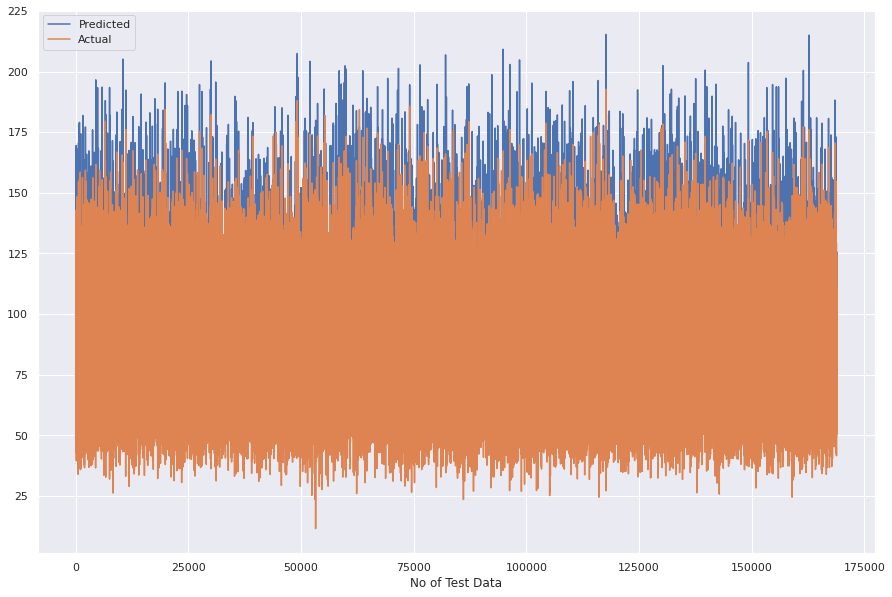

In [143]:
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

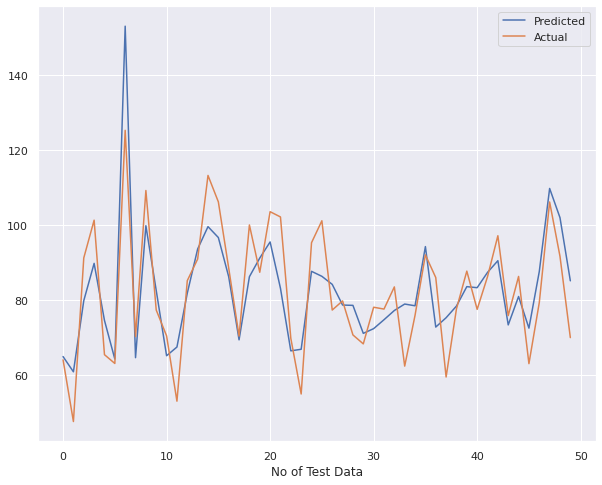

In [144]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test[0:50])
plt.plot(np.array(y_test[0:50]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [145]:
from sklearn.ensemble import GradientBoostingRegressor

In [146]:
# define model
model_grad = GradientBoostingRegressor()
# fit model
model_grad.fit(X_train, y_train)

GradientBoostingRegressor()

In [147]:
y_pred_train=model_grad.predict(X_train)
y_pred_test=model_grad.predict(X_test)

In [148]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 60.26056493214967
RMSE : 7.762767865404045
R2 : 0.8027747923640219
Adjusted R2 : 0.8027584399574499


In [149]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 60.32770452819198
RMSE : 7.76709112397891
R2 : 0.8027747923640219
Adjusted R2 : 0.8027584399574499


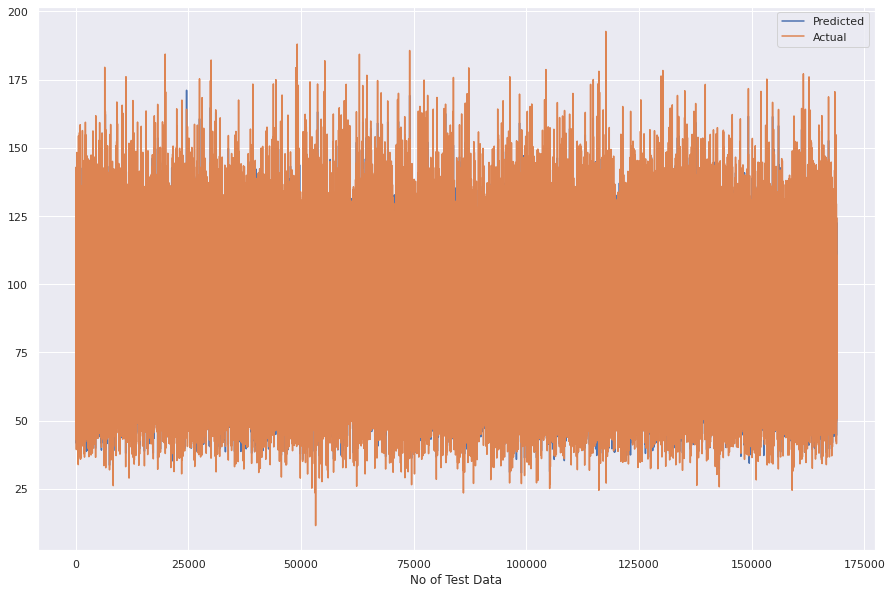

In [150]:
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

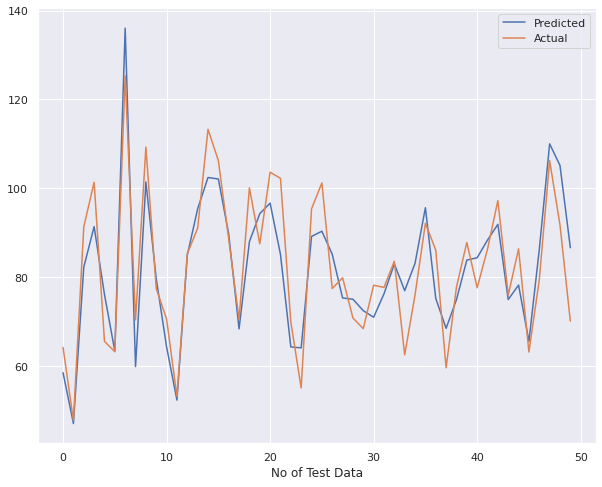

In [151]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test[0:50])
plt.plot(np.array(y_test[0:50]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor



In [ ]:
# define model
model_grad = RandomForestRegressor()
# fit model
model_grad.fit(X_train, y_train)

In [ ]:
y_pred_train=model_grad.predict(X_train)
y_pred_test=model_grad.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test[0:50])
plt.plot(np.array(y_test[0:50]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
import xgboost as xgb
# create an instance of the XGBRegressor class
xgb_reg = xgb.XGBRegressor()

# train the model
xgb_reg.fit(X_train, y_train)

# evaluate the model
score = xgb_reg.score(X_test, y_test)
print(score)